## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [41]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [42]:
df=pd.read_csv("https://raw.githubusercontent.com/juanhubertl8010/dataset/refs/heads/main/property_dataset.csv")
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [43]:
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [45]:
df.isna().sum()

,0
Area Category,1
Nama Daerah,1
Luas Tanah (m2),1
Luas Bangunan (m2),1
Jumlah Kamar,1
Jumlah Kamar Mandi,2
Tingkat/Lantai,2
Harga Penawaran (dari Owner),1
Terjual/Belum,1
Arah Hadap Rumah,83


2.

In [46]:
null_percent = df.isnull().mean() * 100
null_percent

,0
Area Category,0.324675
Nama Daerah,0.324675
Luas Tanah (m2),0.324675
Luas Bangunan (m2),0.324675
Jumlah Kamar,0.324675
Jumlah Kamar Mandi,0.649351
Tingkat/Lantai,0.649351
Harga Penawaran (dari Owner),0.324675
Terjual/Belum,0.324675
Arah Hadap Rumah,26.948052


Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [47]:
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to your DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Verify the null values after imputation
df_imputed.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [48]:
df_imputed.isnull().sum()

,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran (dari Owner),0
Terjual/Belum,0
Arah Hadap Rumah,0


Drop the column 'Nama Daerah' because all the values are different.

In [49]:
df_drop = df_imputed.drop(columns=['Nama Daerah'])
df_drop.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


3.

In [50]:
encoder = LabelEncoder()#encode buat ganti string/object jadi bentuk angka

df_drop['Area Category'] = encoder.fit_transform(df_drop['Area Category'])
df_drop['Terjual/Belum'] = encoder.fit_transform(df_drop['Terjual/Belum'])
df_drop['Arah Hadap Rumah'] = encoder.fit_transform(df_drop['Arah Hadap Rumah'])
df_drop['Posisi Rumah'] = encoder.fit_transform(df_drop['Posisi Rumah'])
df_drop['Lebar Jalan Depan Rumah (ROW)'] = encoder.fit_transform(df_drop['Lebar Jalan Depan Rumah (ROW)'])
df_drop.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,0,3,2,0
1,0,30.0,60.0,2.0,1.0,2.0,287799000,0,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,0,1,0,0
3,2,187.0,250.0,5.0,5.0,2.0,3100000000,0,3,2,0
4,1,350.0,600.0,5.0,5.0,2.0,5000000000,0,0,2,0


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [51]:
df_drop['Harga Penawaran (dari Owner)'] = df_drop['Harga Penawaran (dari Owner)'].replace(" ", "10500000000")
df_drop['Harga Penawaran (dari Owner)'] = df_drop['Harga Penawaran (dari Owner)'].str.replace(r'\D', '', regex=True)
df_drop['Harga Penawaran (dari Owner)'] = df_drop['Harga Penawaran (dari Owner)'].astype(int)

check the data type

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Change the data types from:

- float to int
- object to int

In [53]:
df_dropp = df_drop.astype(int)
df_dropp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int64
 1   Luas Tanah (m2)                308 non-null    int64
 2   Luas Bangunan (m2)             308 non-null    int64
 3   Jumlah Kamar                   308 non-null    int64
 4   Jumlah Kamar Mandi             308 non-null    int64
 5   Tingkat/Lantai                 308 non-null    int64
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int64
 8   Arah Hadap Rumah               308 non-null    int64
 9   Posisi Rumah                   308 non-null    int64
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64
dtypes: int64(11)
memory usage: 26.6 KB


4.

In [54]:
scaler = StandardScaler()
df_scaling = pd.DataFrame(scaler.fit_transform(df_dropp), columns=df_dropp.columns)

# Menampilkan hasil scaling dengan nama kolom yang sesuai
df_scaling.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,1.004372,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,0.0,0.839497,-0.188069,-0.825581
1,-1.677824,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0.0,0.839497,-0.188069,0.220834
2,1.004372,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,0.0,-1.141845,-5.453988,-0.825581
3,0.110307,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,0.0,0.839497,-0.188069,-0.825581
4,-0.783759,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,0.0,-2.132516,-0.188069,-0.825581


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

Text(0, 0.5, 'SSE')

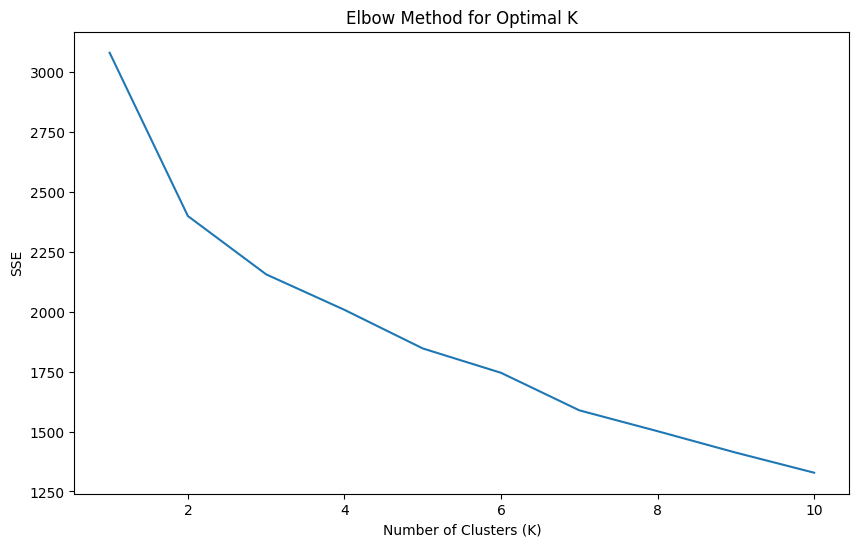

In [55]:
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaling)
    sse.append(kmeans.inertia_)

# Plot the inertia for each value of k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')

In [56]:
kneedle = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
print("The best k for your model is:", kneedle.elbow)

The best k for your model is: 3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [57]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(df_scaling)
y_pred

array([2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1,
       2, 2, 0, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 2, 0, 1, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 0, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 1, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2,

In [58]:
Inverse_df = pd.DataFrame(scaler.inverse_transform(df_scaling), columns=df_scaling.columns)
Inverse_df['Cluster'] = y_pred
Inverse_df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,0.0,3.0,2.0,0.0,2
1,0.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,0.0,3.0,2.0,1.0,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,0.0,1.0,0.0,0.0,2
3,2.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,0.0,3.0,2.0,0.0,2
4,1.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,0.0,0.0,2.0,0.0,1


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [59]:
cluster_summary = {}

# Daftar kolom continuous dan categorical
continuous_columns = ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Harga Penawaran (dari Owner)']
categorical_columns = ['Area Category', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai',
                       'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']

# Mengelompokkan data berdasarkan 'Cluster'
grouped = Inverse_df.groupby('Cluster')



# Menghitung mean, min, dan max untuk kolom continuous
for col in continuous_columns:
    cluster_summary[f'{col} Mean'] = grouped[col].mean()
    cluster_summary[f'{col} Min'] = grouped[col].min()
    cluster_summary[f'{col} Max'] = grouped[col].max()

# Menghitung mode, min, dan max untuk kolom categorical
for col in categorical_columns:
    if col in Inverse_df.columns:
        cluster_summary[f'{col} Mode'] = grouped[col].agg(lambda x: ', '.join(map(str, x.mode())) if not x.mode().empty else None)
        cluster_summary[f'{col} Min'] = grouped[col].min()
        cluster_summary[f'{col} Max'] = grouped[col].max()
    else:
        print(f"Kolom '{col}' tidak ditemukan di dataframe.")

# Mengubah dictionary ringkasan cluster menjadi DataFrame
cluster_summary_df = pd.DataFrame(cluster_summary)

# Menampilkan ringkasan cluster
cluster_summary_df.T

Kolom 'Tingkat/Lantai' tidak ditemukan di dataframe.


Cluster,0,1,2
Luas Tanah (m2) Mean,177.966667,516.215385,132.875817
Luas Tanah (m2) Min,47.0,200.0,14.0
Luas Tanah (m2) Max,495.0,1561.0,360.0
Luas Bangunan (m2) Mean,207.888889,591.4,163.326797
Luas Bangunan (m2) Min,34.0,250.0,14.0
Luas Bangunan (m2) Max,500.0,1200.0,400.0
Harga Penawaran (dari Owner) Mean,3223699999.977778,14233922907.661539,2150763682.418301
Harga Penawaran (dari Owner) Min,325000000.0,2500000000.0,160000000.0
Harga Penawaran (dari Owner) Max,19500000000.0,99000000000.0,8000000000.0
Area Category Mode,1.0,1.0,3.0


In [60]:
cluster_summary['Count'] = grouped.size()
cluster_summary['Count']

,0
Cluster,
0,90
1,65
2,153


In [61]:
# write down your interpretation from the cluster that you have been made
print("Conclusion: Cluster 0 adalah cluster elite, cluster 1 adalah top cluster (kelas sultan), cluster 2 adalah cluster elite tetapi tidak seelite cluster 0")


Conclusion: Cluster 0 adalah cluster elite, cluster 1 adalah top cluster (kelas sultan), cluster 2 adalah cluster elite tetapi tidak seelite cluster 0


## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

Text(0, 0.5, 'Silhouette Scores')

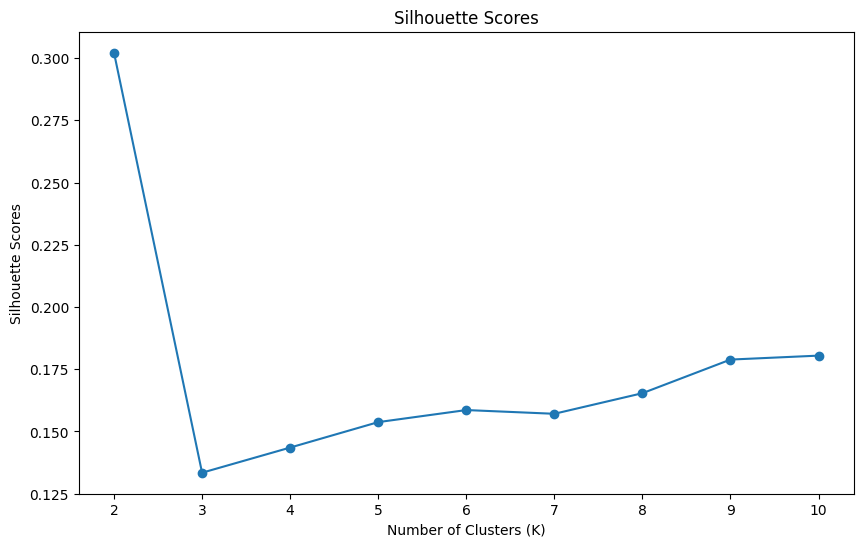

In [65]:
silhouette_scores = []
for k in range(2,11):
    cluster_labels = fcluster(linkage(df_scaling, method="ward"), k, criterion='maxclust')
    silhouette_avg = silhouette_score(df_scaling, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the inertia for each value of k
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Scores')

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [75]:
# agglomerative clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc=hc.fit_predict(df_scaling)
y_hc

array([2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 1,
       2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2, 0,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 2, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 2, 1, 0,

In [76]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaling)
kmeans_labels

array([2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1,
       2, 2, 0, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 2, 0, 1, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 0, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 1, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2,

In [78]:
df_scaled_with_labels = pd.DataFrame(scaler.inverse_transform(df_scaling), columns=df_scaling.columns)
df_scaled_with_labels['KMeans_Cluster'] = kmeans_labels  # Add KMeans cluster labels
df_scaled_with_labels['Agglo_Cluster'] = y_hc

df_scaled_with_labels.head()


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans_Cluster,Agglo_Cluster
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,0.0,3.0,2.0,0.0,2,2
1,0.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,0.0,3.0,2.0,1.0,2,0
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,0.0,1.0,0.0,0.0,2,1
3,2.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,0.0,3.0,2.0,0.0,2,2
4,1.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,0.0,0.0,2.0,0.0,1,1


Display the cluster summary in the form of a dataframe.

In [80]:
cluster_summary = {}

# Daftar kolom continuous dan categorical
continuous_columns = ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Harga Penawaran (dari Owner)']
categorical_columns = ['Area Category', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai',
                       'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']

# Mengelompokkan data berdasarkan 'Cluster'
grouped = df_scaled_with_labels.groupby('Agglo_Cluster')



# Menghitung mean, min, dan max untuk kolom continuous
for col in continuous_columns:
    cluster_summary[f'{col} Mean'] = grouped[col].mean()
    cluster_summary[f'{col} Min'] = grouped[col].min()
    cluster_summary[f'{col} Max'] = grouped[col].max()

# Menghitung mode, min, dan max untuk kolom categorical
for col in categorical_columns:
    if col in Inverse_df.columns:
        cluster_summary[f'{col} Mode'] = grouped[col].agg(lambda x: ', '.join(map(str, x.mode())) if not x.mode().empty else None)
        cluster_summary[f'{col} Min'] = grouped[col].min()
        cluster_summary[f'{col} Max'] = grouped[col].max()
    else:
        print(f"Kolom '{col}' tidak ditemukan di dataframe.")

# Mengubah dictionary ringkasan cluster menjadi DataFrame
cluster_summary_df = pd.DataFrame(cluster_summary)

# Menampilkan ringkasan cluster
cluster_summary_df.T

Kolom 'Tingkat/Lantai' tidak ditemukan di dataframe.


Agglo_Cluster,0,1,2
Luas Tanah (m2) Mean,170.078014,524.42623,131.415094
Luas Tanah (m2) Min,14.0,170.0,18.0
Luas Tanah (m2) Max,495.0,1561.0,319.0
Luas Bangunan (m2) Mean,210.29078,591.295082,154.90566
Luas Bangunan (m2) Min,14.0,170.0,34.0
Luas Bangunan (m2) Max,600.0,1200.0,362.0
Harga Penawaran (dari Owner) Mean,2996108818.503546,14742212934.377048,2100740566.037736
Harga Penawaran (dari Owner) Min,160000000.0,2500000000.0,250000000.0
Harga Penawaran (dari Owner) Max,14500000000.0,99000000000.0,8000000000.0
Area Category Mode,1.0,1.0,3.0


In [81]:
cluster_summary['Count'] = grouped.size()
cluster_summary['Count']

,0
Agglo_Cluster,
0,141
1,61
2,106


In [83]:
# write down your interpretation from the cluster that you have been made
print("Conclusion: Cluster 0 adalah cluster elite, cluster 1 adalah top cluster (kelas sultan), cluster 2 adalah cluster elite tetapi tidak seelite cluster 0")

Conclusion: Cluster 0 adalah cluster elite, cluster 1 adalah top cluster (kelas sultan), cluster 2 adalah cluster elite tetapi tidak seelite cluster 0


**Hierarchical Visualization**

Single Linkage

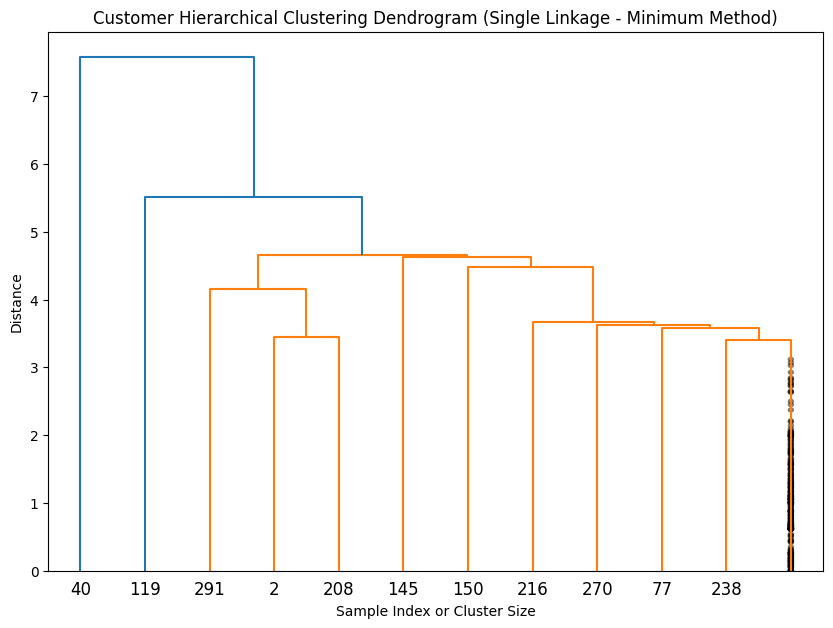

In [85]:
Z_single = linkage(df_scaling, method='single', metric='euclidean')

# Plot the dendrogram for Single Linkage
plt.figure(figsize=(10, 7))
dendrogram(Z_single, truncate_mode='lastp', p=12, show_leaf_counts=False, show_contracted=True)
plt.title('Customer Hierarchical Clustering Dendrogram (Single Linkage - Minimum Method)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

complete linkage

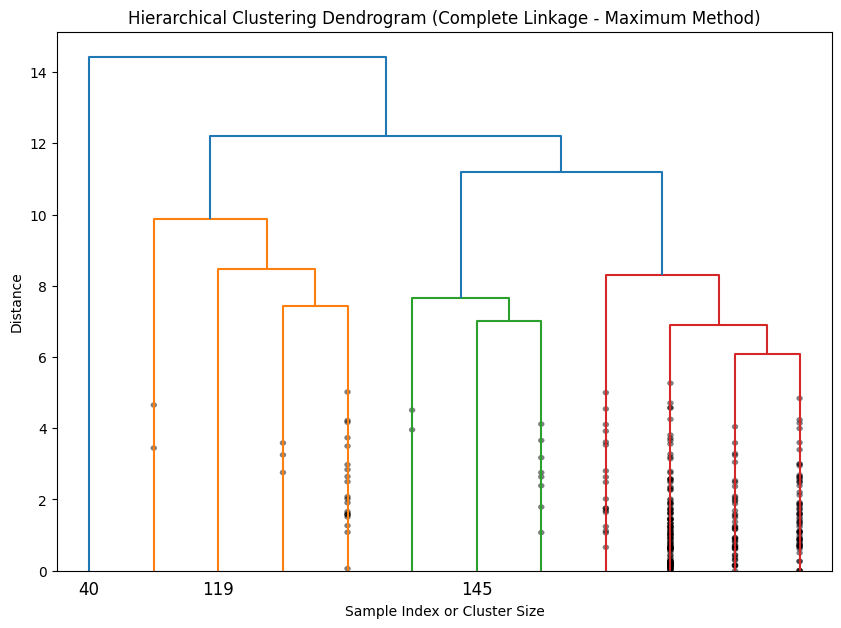

In [86]:
Z_complete = linkage(df_scaling, method='complete', metric='euclidean')

# Plot the dendrogram for Complete Linkage
plt.figure(figsize=(10, 7))
dendrogram(Z_complete, truncate_mode='lastp', p=12, show_leaf_counts=False, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage - Maximum Method)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

average linkage

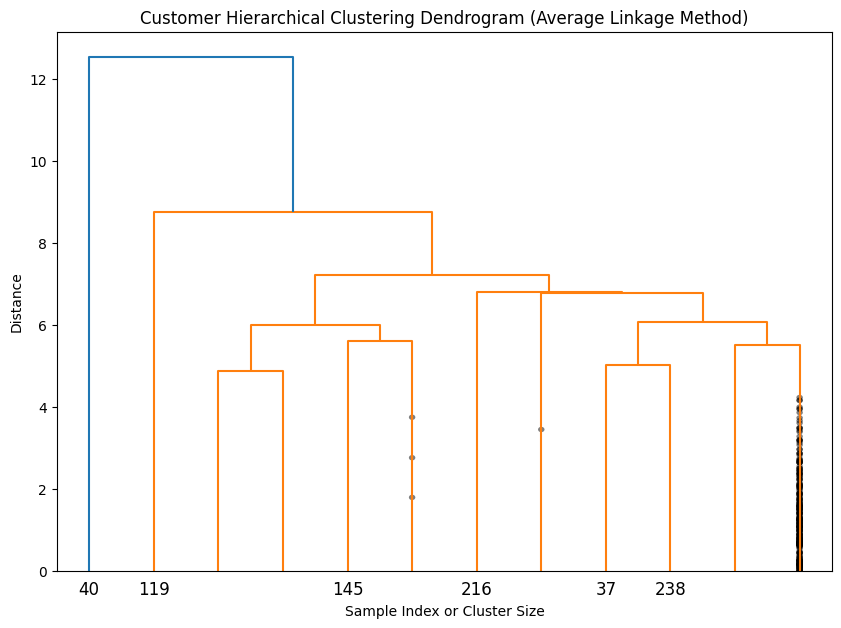

In [87]:
Z_average = linkage(df_scaling, method='average', metric='euclidean')

# Plot the dendrogram for Average Linkage
plt.figure(figsize=(10, 7))
dendrogram(Z_average, truncate_mode='lastp', p=12, show_leaf_counts=False, show_contracted=True)
plt.title('Customer Hierarchical Clustering Dendrogram (Average Linkage Method)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

ward method

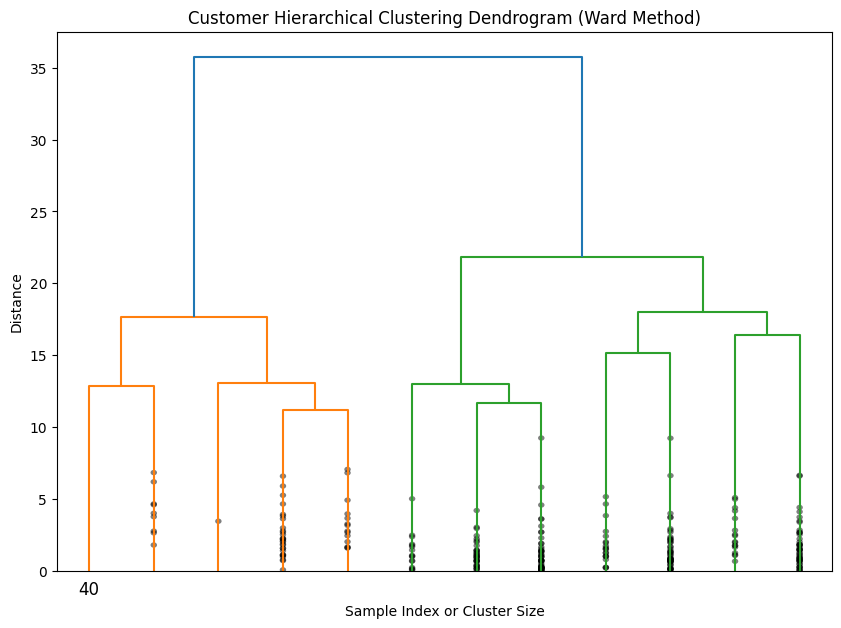

In [88]:
Z_ward = linkage(df_scaling, method='ward', metric='euclidean')

# Plot the dendrogram for Ward's method
plt.figure(figsize=(10, 7))
dendrogram(Z_ward, truncate_mode='lastp', p=12, show_leaf_counts=False, show_contracted=True)
plt.title('Customer Hierarchical Clustering Dendrogram (Ward Method)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()